In [1]:
import torch

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/jovyan/.conda/envs/bioblp-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.font_manager

In [3]:
# matplotlib.font_manager.findSystemFonts()

In [4]:
#
# Constants
sns.set(font="Helvetica Neue")
sns.set_context("paper")
sns.set_style("ticks")

sns.set_palette("colorblind")

In [5]:
metadata_path = "../data/benchmarks/experiments/dpi_fda/1681301749/models/mcs39etm-1681392769-scores.pt"

In [6]:
data = torch.load(metadata_path)

In [7]:
# data[0]

Box plots from wandb export

In [8]:
dpi_r10_results = Path("../data/benchmarks/experiments/DPI/wandb-export-dpi-r10-rflr.csv")

In [9]:
r10_results_df = pd.read_csv(dpi_r10_results, sep=",")

In [10]:
r10_results_df.head()

,Name,test_AUCPR,test_AUCROC,test_precision,test_recall,model_name,model_feature,model_clf,State,Notes,...,train_f1,train_precision,train_recall,train_loss,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
0,wandering-fog-4901,0.167047,0.709363,0.159334,0.699063,complex__LR,complex,LR,finished,-,...,0.64109,0.164754,0.724353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vivid-shape-4989,0.175940,0.722035,0.162764,0.712527,bioblpd__LR,bioblpd,LR,finished,-,...,0.64848,0.169383,0.734373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,valiant-forest-2559,0.389755,0.871312,0.458941,0.505621,transe__RF,transe,RF,finished,-,...,0.94477,0.635980,0.917749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,upbeat-lion-5040,0.166173,0.715633,0.162271,0.719946,bioblpm__LR,bioblpm,LR,finished,-,...,0.63688,0.164603,0.734725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tough-sea-3088,0.308480,0.826495,0.396246,0.209047,bioblpp__RF,bioblpp,RF,finished,-,...,0.97727,0.802603,0.994579,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

feat_labels = ["BioBLP-D", "BioBLP-M", "BioBLP-P", "ComplEx", "Noise", "RotatE", "Structural", "TransE"]
feat_dict = {x.lower().replace("-", ""): x for x in feat_labels}

r10_results_df["model_feature"] = r10_results_df["model_feature"].apply(lambda x: feat_dict.get(x, x))

In [12]:
rf_results = r10_results_df[r10_results_df["model_clf"] == "RF"].sort_values(by=["model_feature"])



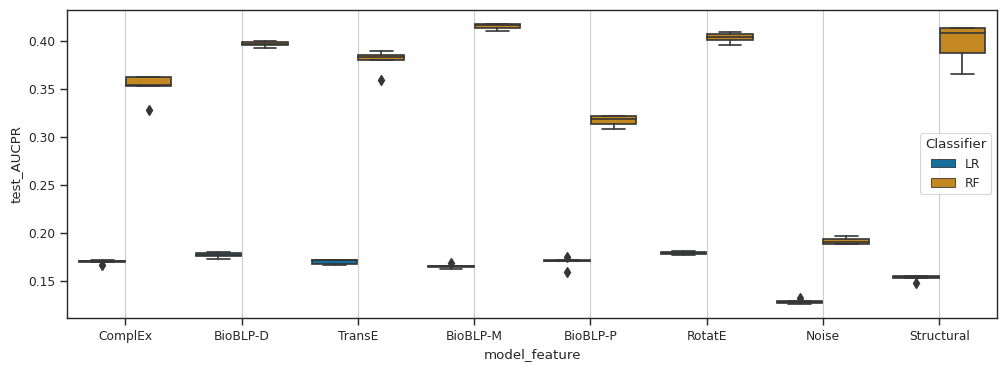

In [41]:
plt.figure(figsize=(12,4))
sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCPR", hue="model_clf")
plt.grid(axis="x")

plt.legend(title='Classifier')

plt.show()

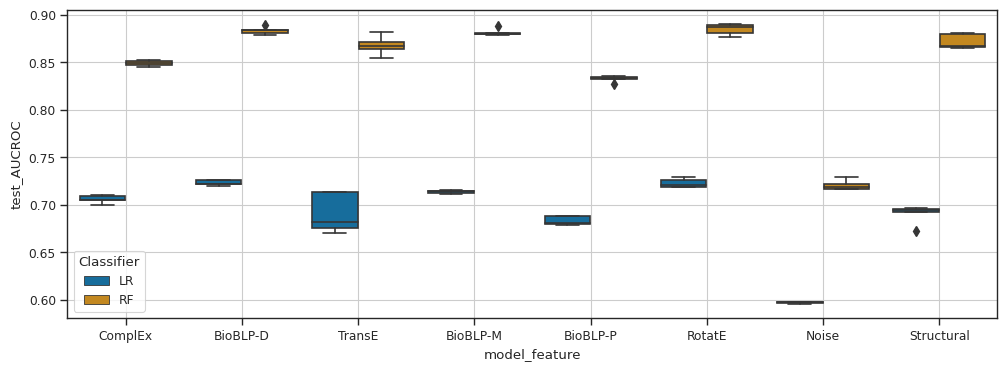

In [40]:
plt.figure(figsize=(12,4))
sns.boxplot(data=r10_results_df, x="model_feature", y="test_AUCROC", hue="model_clf")
plt.grid(axis="both")
plt.legend(title='Classifier')

plt.show()

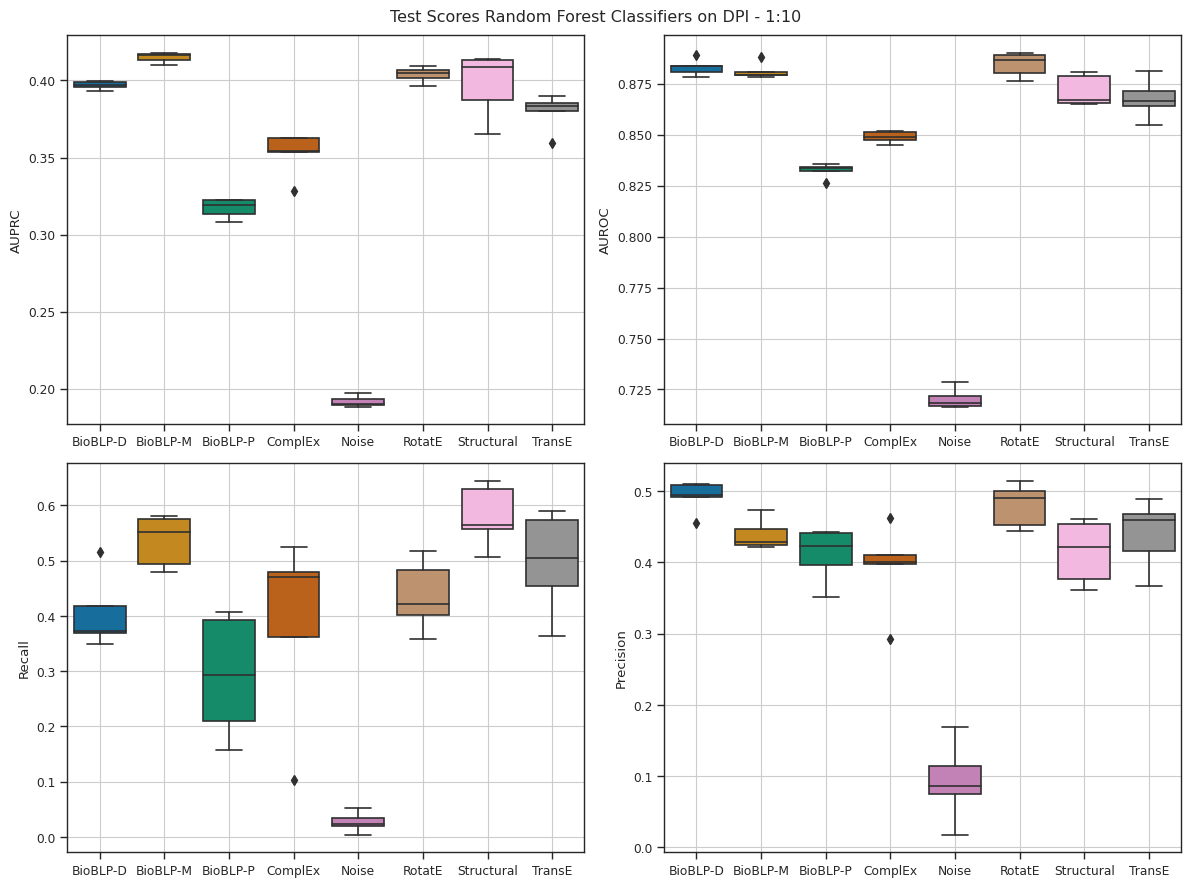

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))


g = sns.boxplot(data=rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0, 0]).set(ylabel="AUPRC", xlabel="", xticks=range(len(feat_labels)))

sns.boxplot(data=rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[0, 1]).set(ylabel="AUROC", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_recall", 
            ax=axs[1, 0]).set(ylabel="Recall", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_precision", 
            ax=axs[1, 1]).set(ylabel="Precision", xlabel="")
# sns.despine()

plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:10")
axs[0][0].grid(axis="both")
axs[0][1].grid(axis="both")
axs[1][0].grid(axis="both")
axs[1][1].grid(axis="both")

plt.tight_layout()
plt.show()

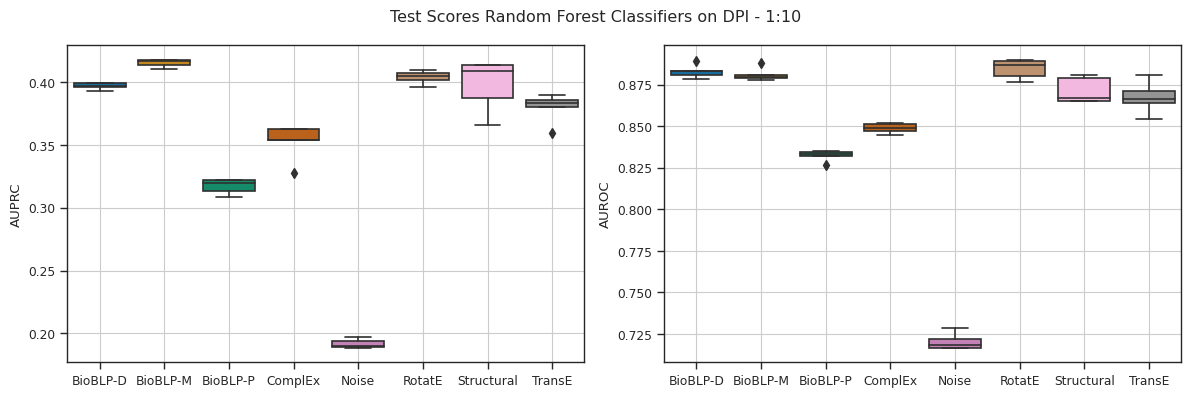

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0]).set(ylabel="AUPRC", xlabel="")
sns.boxplot(data=rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[1]).set(ylabel="AUROC", xlabel="")
axs[0].grid(axis="both")
axs[1].grid(axis="both")

# sns.despine()
plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:10")
plt.tight_layout()

plt.show()

### r 1:1

In [17]:
dpi_r1_results = Path("../data/benchmarks/experiments/DPI/wandb-export-dpi-r1-all.csv")

In [18]:
r1_results_df = pd.read_csv(dpi_r1_results, sep=",")
r1_results_df.head()

,Name,test_AUCPR,test_AUCROC,test_precision,test_recall,model_name,model_feature,model_clf,State,Notes,...,train_f1,train_precision,train_recall,train_loss,valid_AUCPR,valid_AUCROC,valid_f1,valid_loss,valid_precision,valid_recall
0,zesty-monkey-3671,0.838981,0.864554,0.780147,0.822537,structural__RF,structural,RF,finished,-,...,0.972227,0.962689,0.982532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zany-plant-3608,0.645409,0.678157,0.635699,0.628212,noise__RF,noise,RF,finished,-,...,0.914271,0.905848,0.924642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zany-donkey-3870,0.838453,0.856992,0.787618,0.759368,bioblpd__RF,bioblpd,RF,finished,-,...,0.967576,0.950132,0.986950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,woven-sun-3163,0.591934,0.606630,0.577589,0.562901,noise__LR,noise,LR,finished,-,...,0.585243,0.586946,0.575358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,woven-snow-3518,0.649606,0.704562,0.648947,0.709237,bioblpm__LR,bioblpm,LR,finished,-,...,0.690146,0.673357,0.738607,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
r1_results_df["model_feature"] = r1_results_df["model_feature"].apply(lambda x: feat_dict.get(x, x))


r1_rf_results = r1_results_df[r1_results_df["model_clf"] == "RF"].sort_values(by=["model_feature"])



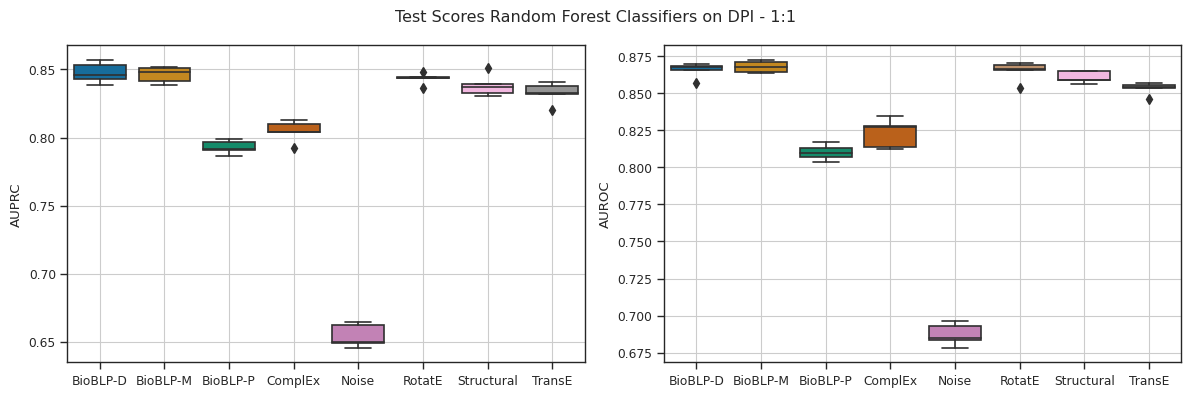

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=r1_rf_results, x="model_feature", y="test_AUCPR", 
            ax=axs[0]).set(ylabel="AUPRC", xlabel="")
sns.boxplot(data=r1_rf_results, x="model_feature", y="test_AUCROC", 
            ax=axs[1]).set(ylabel="AUROC", xlabel="")
axs[0].grid(axis="both")
axs[1].grid(axis="both")
# sns.despine()
plt.suptitle("Test Scores Random Forest Classifiers on DPI - 1:1")
plt.tight_layout()

plt.show()

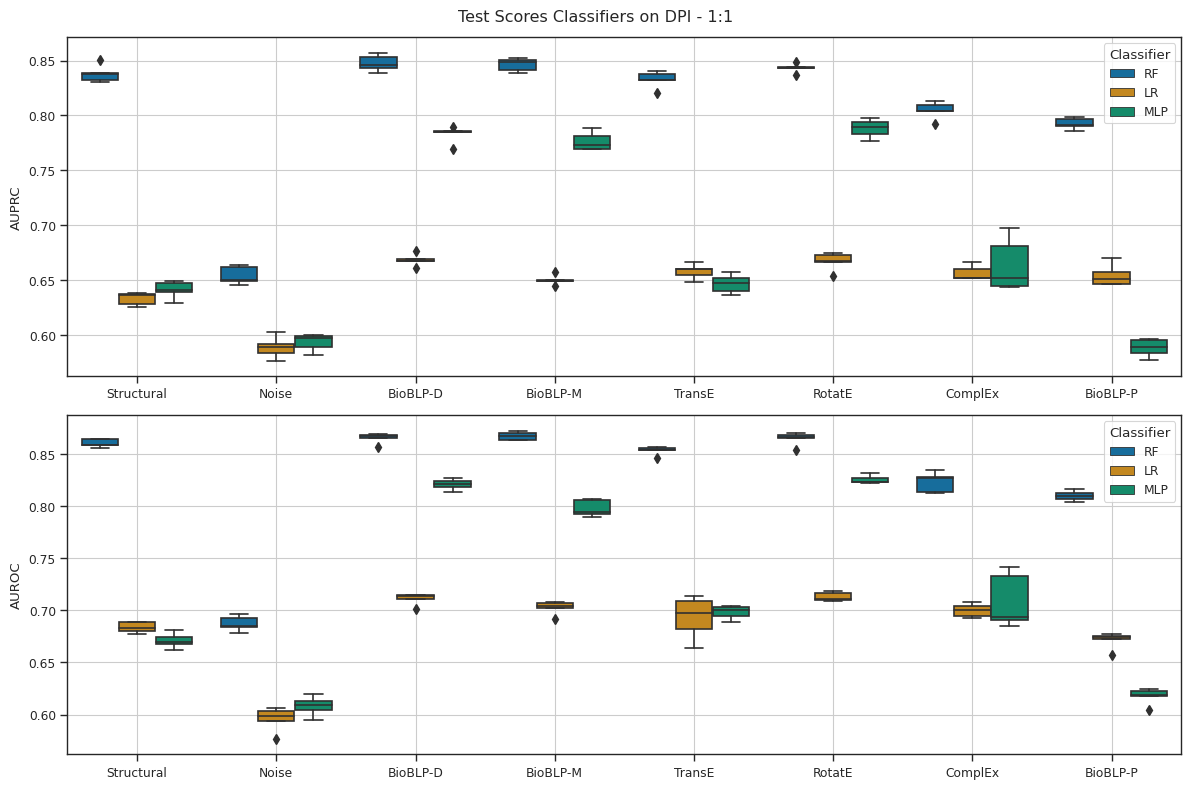

In [39]:

fig, axs = plt.subplots(2, 1, figsize=(12,8))

sns.boxplot(data=r1_results_df, x="model_feature", y="test_AUCPR", hue="model_clf",
            ax=axs[0]).set(ylabel="AUPRC", xlabel="")
# plt.grid()

sns.boxplot(data=r1_results_df, x="model_feature", y="test_AUCROC", hue="model_clf",
            ax=axs[1]).set(ylabel="AUROC", xlabel="")

axs[0].legend(title='Classifier')
axs[1].legend(title='Classifier')

axs[0].grid(axis="both")
axs[1].grid(axis="both")
# sns.despine()
# plt.grid()
plt.suptitle("Test Scores Classifiers on DPI - 1:1")
plt.tight_layout()
plt.show()